<a href="https://colab.research.google.com/github/Tanjul5/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/YesBank_stock_closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>YES BANK STOCK CLOSING PRICE PREDICTION</b>

### <b>Problem Statement</b>

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

<b>Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model</b>

In [80]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [81]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Read CSV File
Yes_Bank_df = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### <b> Data Overview </b>

In [83]:
Yes_Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [84]:
Yes_Bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [85]:
Yes_Bank_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [86]:
Yes_Bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be Close, and independent variables are - Open, High and Low.



* <b>Date</b>: It denotes the month and year of the for a particular price.
*<b>Open</b>: Open means the price at which a stock started trading that month.
*<b>High</b>: refers to the maximum price that month.
*<b>Low</b>: refers to the minimum price that month.
*<b>Close</b>: refers to the final trading price for that month, which we have to predict using regression








## <b> EDA and Data Pre-Processing</b>

In [87]:
Yes_Bank_df['Date'].unique

<bound method Series.unique of 0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object>

In [88]:
#copying data to preserve orignal file
df1= Yes_Bank_df.copy()

In [89]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df1['Date'] = pd.to_datetime(Yes_Bank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [90]:
#check duplicate entries
len(df1[df1.duplicated()])

0

In [91]:
#check if changes are being reflected
df1.head(1)

,Date,Open,High,Low,Close
0,2005-07-01,13.0,14.0,11.25,12.46


BIFURCATE DEPENDENT AND INBDEPENDENT VARIABLE

##<b> Univariet Analysis</b>

In [92]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

In [93]:
import plotly.express as px

We will take a look at distribution plots of our features.

### <b>INDEPENDENT VARIABLES</b>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

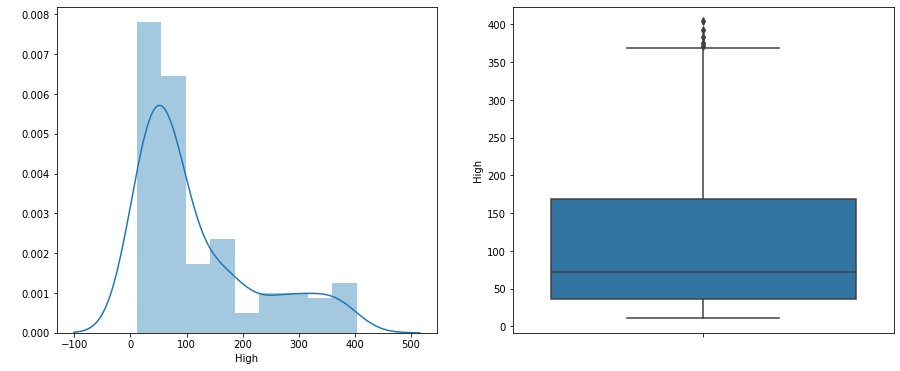

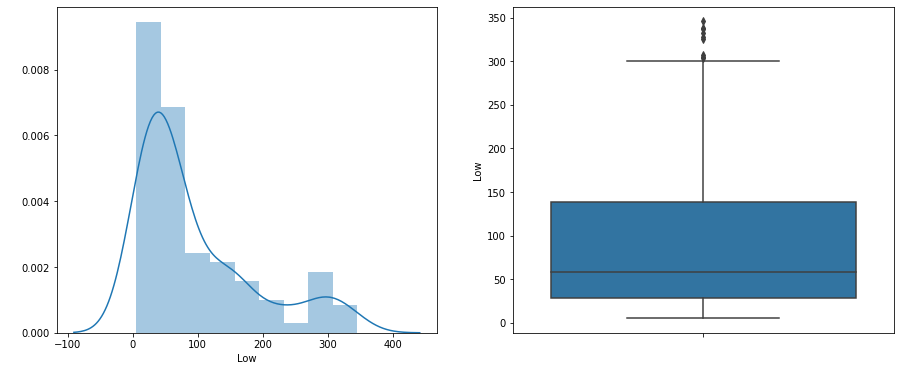

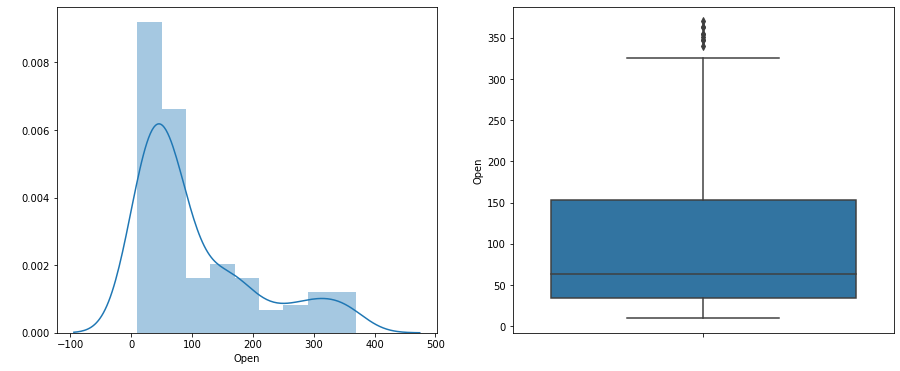

In [94]:
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var])
    fig.set_title('')
    fig.set_ylabel(var)

DEPENDENT VARIABLES

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Open')

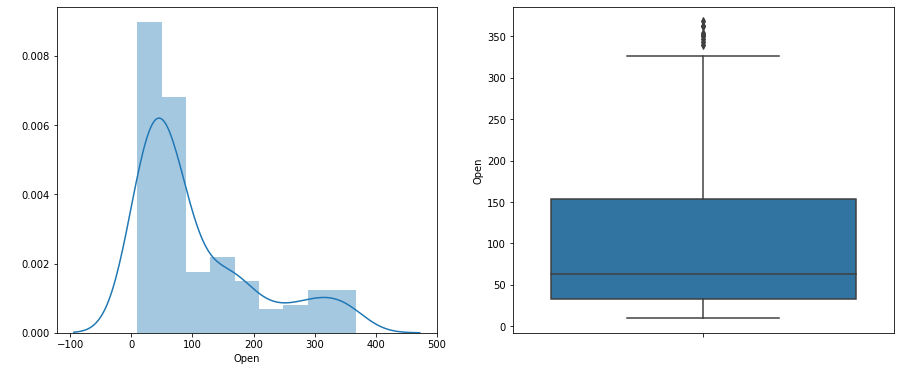

In [95]:
#plots for dependent variable
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df1['Close'])
fig.set_title('')
fig.set_ylabel(var)

##<b> Data Transformation</b>

ince our data is skewed, we will perform some transformations during regression analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

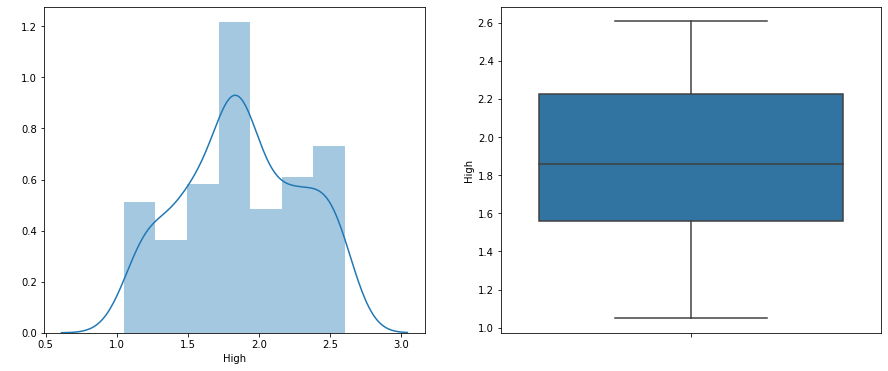

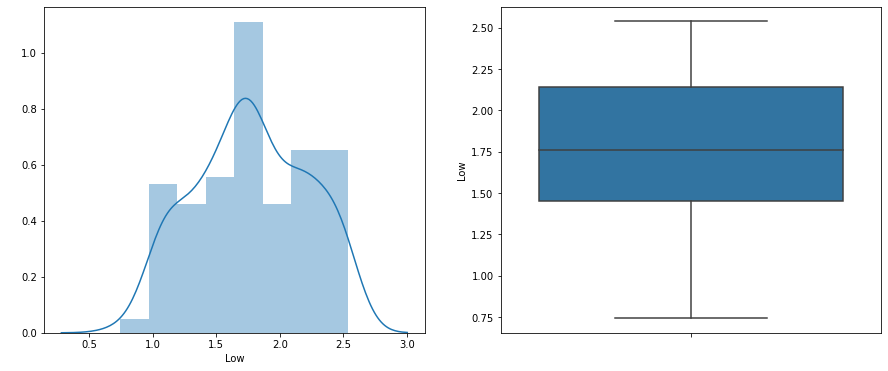

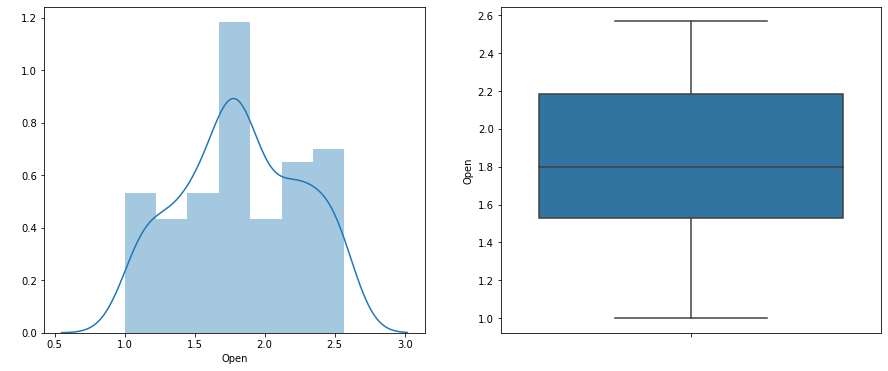

In [96]:
#independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df1[var]))
    fig.set_title('')
    fig.set_ylabel(var)

### <b>BIVARIATE ANALYSIS</b>

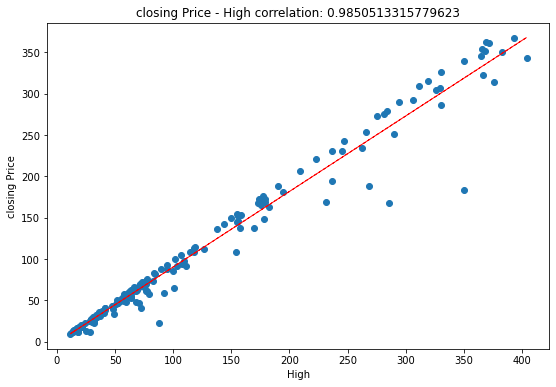

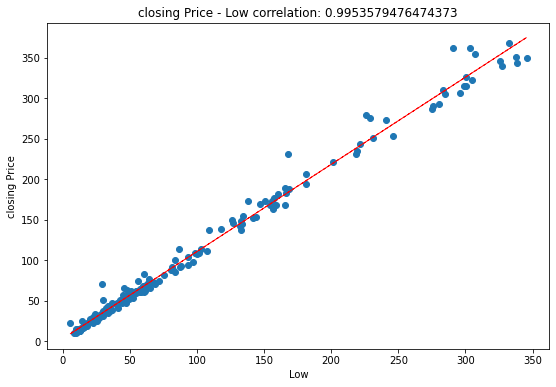

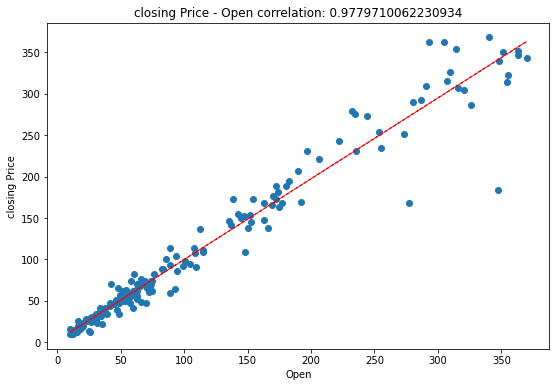

In [97]:
#scatter plot between dependent variable with all independent variables.
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])
 
   plt.plot(df1[col], y_hat, "r--", lw=1)
 
plt.show()


We can clearly make out that all the independent variables are linearly affecting our dependent variable.

CORRELATION

Now, we will see the correlation between all the features in our data set.

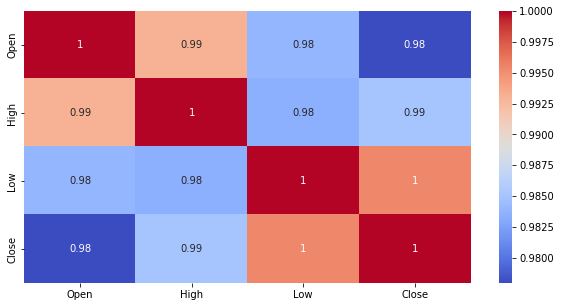

In [98]:
#correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

In [99]:
#Multicollinearity
#VIF score

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [100]:
calc_vif(indep_var)

,variables,VIF
0,High,167.057523
1,Low,71.574137
2,Open,175.185704


In [101]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

## <b>LINEAR REGRESSION</b>

In [102]:
#independent variable
x=df1[['High','Low','Open']]

#dependent variable
y=df1['Close']

In [103]:
x

,High,Low,Open
0,14.00,11.25,13.00
1,14.88,12.55,12.58
2,14.87,12.27,13.48
3,14.47,12.40,13.20
4,13.88,12.88,13.35
...,...,...,...
180,28.30,11.10,25.60
181,17.16,11.85,12.00
182,15.34,12.75,14.30
183,14.01,12.11,13.30


In [104]:
y

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

In [105]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [106]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)

In [107]:
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [108]:
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (148, 3)
x_test:  (37, 3)
y_train:  (148,)
y_test:  (37,)


In [109]:
# Fitting Linear Regression to the Training set
reg = LR()
reg = LR().fit(x_train, y_train)

In [110]:
#predictions
y_pred = reg.predict(x_test)

In [111]:
# Fitting Linear Regression to the Training set
lr = LR()
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
#predictions
y_pred = lr.predict(x_test)

In [113]:
lr.coef_

array([ 206.39223501,  339.75965241, -178.58396386])

In [114]:
lr.intercept_

7.981643192931017

In [115]:
#defining mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [116]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.052764712964646
MSE : 19.988578593595022
RMSE : 4.470858820584142
MAPE : 5.404201340281821


In [117]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i+=1

### <b> VISUALISATION</b>

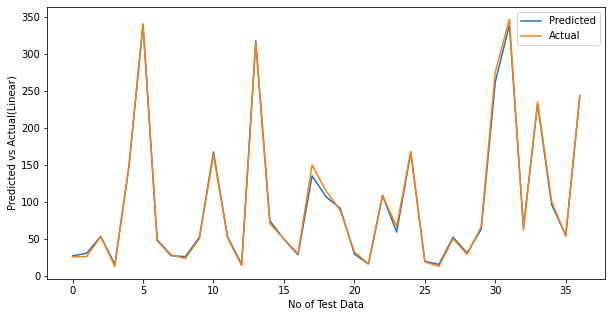

In [118]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel ('Predicted vs Actual(Linear)')
plt.show()

## <b>LASSO REGRESSION</b>

In [119]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [120]:
lasso.score(x_train, y_train)

0.9943947120445368

In [121]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 1.203e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+03, tolerance: 1.205e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [122]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -62.90049172560621


In [123]:
#prediction
y_pred = lasso_regressor.predict(x_test)


In [124]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.1308568938605057
MSE : 20.878651216190214
RMSE : 4.569316274475889
MAPE : 5.53404458516646


In [125]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)


i=i+1

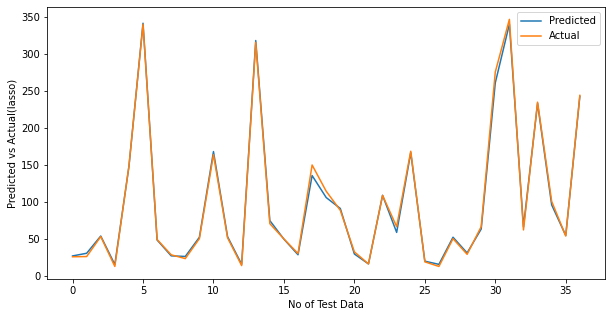

In [126]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel ('Predicted vs Actual(lasso)')
plt.show()

## <b>Ridge Regression</b>

In [127]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [128]:
ridge.score(x_train, y_train)

0.9920836705746654

In [129]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [130]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -59.33373789118506


In [131]:
#Prediction
y_pred = ridge_regressor.predict(x_test)

In [132]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 3.0610224606861562
MSE : 20.095425485603638
RMSE : 4.482792152844434
MAPE : 5.4167371098230905


In [133]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

## <b>Visualization</b>

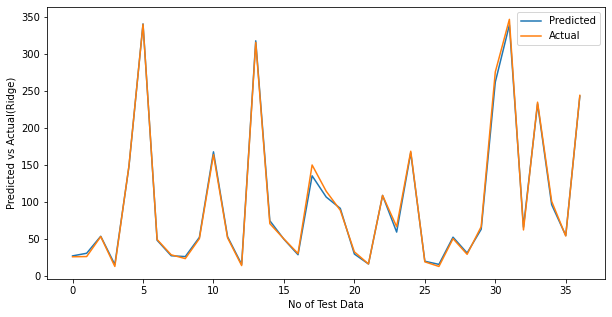

In [134]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel ('Predicted vs Actual(Ridge)')
plt.show()

## <b> KNN</b>

In [135]:
#hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)

In [136]:
#fitting data
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [137]:
#prediction
y_pred=model.predict(x_test)

In [138]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 4.104324324324326
MSE : 37.72864864864864
RMSE : 6.142365069633084
MAPE : 6.4409728288406365


In [139]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='KNN regressor'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

##<b>Visualization</b>

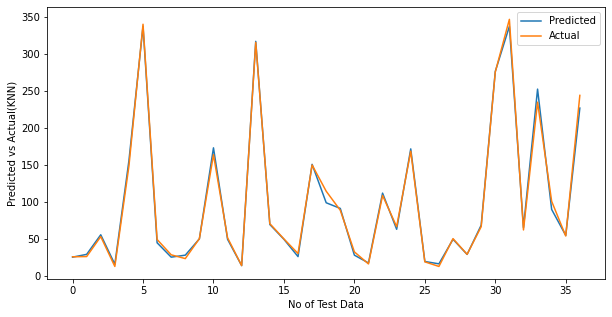

In [140]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel ('Predicted vs Actual(KNN)')
plt.show()

## <b>Applying Cross Validation for ElasticNet Regression</b>

In [141]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 1.203e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+03, tolerance: 1.205e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [142]:
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

{'alpha': 0.0001, 'l1_ratio': 0.3}
-62.325901811975996


In [143]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [144]:
#evaluation_metrics
MAE = mean_absolute_error(y_test,y_pred_elastic)
print('mean_absolute_error:',MAE)
MSE = mean_squared_error(y_test,y_pred_elastic)
print("Mean Squared Error: ",MSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)
r2 = r2_score(y_test,y_pred_elastic)
print("R2: ",r2)
adjusted_r2 = 1-(1-r2_score(y_test,y_pred_elastic))*(x_test.shape[0]-1)/((x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2: ",adjusted_r2)

mean_absolute_error: 3.1335320151410624
Mean Squared Error:  21.250552258088717
Root Mean Squared Error:  4.609832129057274
R2:  0.9977049622680845
Adjusted R2:  0.997496322474274


In [145]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='ElasticNet Regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

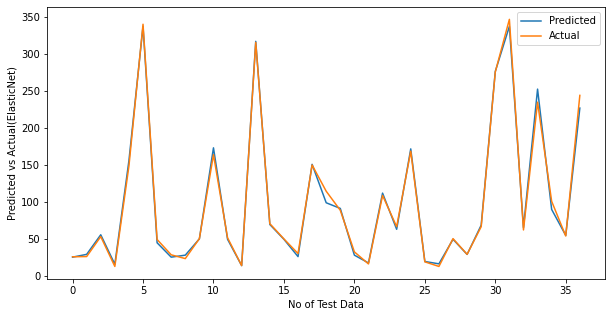

In [146]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.ylabel ('Predicted vs Actual(ElasticNet)')
plt.show()

## <b>XGBOOST REGRESSOR</b>

Since Xgboost is a black box technique and has a lot of inbuilt functions, we will put untransformed data through it.

I tried running the data with manual inputs but XGB gave the best results with no human intervention, I guess the machine is already smarter than me

In [147]:
#data split
x_train, x_test,y_train, y_test = train_test_split((indep_var),(dep_var),test_size=.20,random_state=1)

In [148]:
#fitting data
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

[16:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [149]:
#prediction
y_pred = xgb.predict(x_test)

In [150]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

MAE : 4.25945175686398
MSE : 32.91328663051823
RMSE : 5.737010251909807
MAPE : 6.839571142342331


In [151]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='XGBoost regressor'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

##<b>Visualization</b>

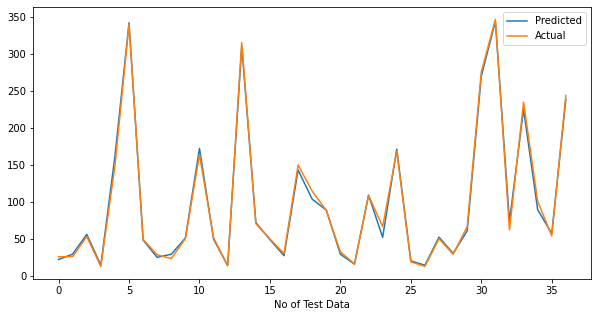

In [152]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## <b>METRICS COMPARISION</b>

We will now compare performance of all the regression models-

In [153]:
#sorting metrics
error_df.sort_values(by=['MAE'],ascending=True,inplace=True)


In [154]:
error_df

,Model_Name,MAE,MSE,RMSE,MAPE
0,Linear regression,3.05,19.99,4.47,5.40
2,Ridge regression,3.06,20.10,4.48,5.42
1,Lasso regression,3.13,20.88,4.57,5.53
4,ElasticNet Regression,3.13,21.25,4.61,6.44
3,KNN regressor,4.10,37.73,6.14,6.44
5,XGBoost regressor,4.26,32.91,5.74,6.84


##<b>Conclusion</b>

1. The target variable is highly dependent on input variables.
2. Linear Regression has given the best results with lowest MAE, MSE, RMSE and MAPE scores.
3. Ridge regression shrunk the parameters to reduce complexity and multicollinearity, but ended up affecting the evaluation metrics.
4. Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).
5. The accuracy for each model is more than 90%.
6. KNN AND XGBoost have given similar results.